In [113]:
import cv2
import json
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import urllib.request


## Imagem do dataset MS COCO

In [114]:
image_path = "images/COCO_val2014_000000441287.jpg"
img = cv2.pyrDown(cv2.imread(image_path, cv2.IMREAD_UNCHANGED))

In [115]:
annotation = json.loads(open('annotations/mscoco_val2014_annotations.json').read())
annotation["annotations"][0]

{'answer_type': 'other',
 'answers': [{'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'wood', 'answer_confidence': 'maybe', 'answer_id': 8},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 350623,
 'multiple_choice_answer': 'wood',
 'question_id': 3506232,
 'question_type': 'what is the'}

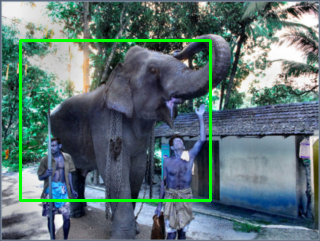

In [116]:
#Desenhando um retangulo verde
x = 20
y = 50
w = 190
h = 150
img = cv2.rectangle(img, (20, 40), (x+w, y+h), (0, 255, 0), 2)

Image.fromarray(img)

## Imagem dataset Imagenet

In [117]:
imagenet_urls = 'annotations/fall11_urls.txt'

data = pd.read_csv(imagenet_urls, header = None, delimiter= "	", error_bad_lines=False, nrows=10, names=['filename', 'url'])
data.head()


,filename,url
0,n00004475_6590,http://farm4.static.flickr.com/3175/2737866473...
1,n00004475_15899,http://farm4.static.flickr.com/3276/2875184020...
2,n00004475_32312,http://farm3.static.flickr.com/2531/4094333885...
3,n00004475_35466,http://farm4.static.flickr.com/3289/2809605169...
4,n00004475_39382,http://2.bp.blogspot.com/_SrRTF97Kbfo/SUqT9y-q...


In [118]:
image_path = "images/281890778_1e165563f6.jpg"
img = cv2.pyrDown(cv2.imread(image_path, cv2.IMREAD_UNCHANGED))

In [119]:
import xml.etree.ElementTree as ET

xml_file = 'annotations/n01503061/n01503061_21376.xml'

tree = ET.parse(xml_file)
root = tree.getroot()
bbox = root.findall("object")[0].findall("bndbox")[0]

xmin = int(bbox[0].text)
ymin = int(bbox[1].text)
xmax = int(bbox[2].text)
ymax = int(bbox[3].text)

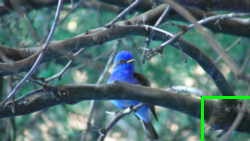

In [120]:
img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
Image.fromarray(img)